In [46]:
import numpy as np 
import pandas as pd 

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
data = pd.read_csv("../Sampled Dataset/Random 50-50 Sampled Data.csv")
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,normAmount,Class
0,-10.632375,7.251936,-17.681072,8.204144,-10.166591,-4.510344,-12.981606,6.783589,-4.659330,-14.924655,...,2.715357,0.695603,-1.138122,0.459442,0.386337,0.522438,-1.416604,-0.488307,0.400490,1
1,0.385108,1.217620,-1.953872,2.087076,-1.144225,-0.576888,-2.582865,0.643230,-1.191233,-3.095094,...,0.594623,0.372144,-0.310456,-0.624065,0.840216,-0.159452,0.599482,0.288916,-0.321245,1
2,-1.157678,0.079901,1.790682,-1.968303,-0.589608,0.137942,-0.641184,0.551862,-1.028029,0.331934,...,0.482099,1.359236,-0.271784,-0.269525,0.063426,-0.189034,-0.062240,-0.139962,-0.315248,0
3,0.225537,-0.271419,0.500382,-1.936124,-0.383645,-0.294170,-0.009929,0.088852,-0.790604,0.253379,...,0.298460,0.723612,-0.067666,-0.513540,-0.389335,-0.240228,0.047369,0.026852,-0.201302,0
4,1.269172,0.444892,0.172031,1.022692,0.015860,-0.732037,0.297024,-0.281962,-0.183246,-0.021727,...,0.018769,0.163191,-0.159069,0.072121,0.777835,-0.310421,0.021357,0.019546,-0.332959,0


In [48]:
normal_data = data.loc[data["Class"] == 0]
fraud_data = data.loc[data["Class"] == 1]
print("Size of normal_data:", len(normal_data))
print("Size of fraud_data:", len(fraud_data))
normal_data.head()

Size of normal_data: 492
Size of fraud_data: 492


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,normAmount,Class
2,-1.157678,0.079901,1.790682,-1.968303,-0.589608,0.137942,-0.641184,0.551862,-1.028029,0.331934,...,0.482099,1.359236,-0.271784,-0.269525,0.063426,-0.189034,-0.062240,-0.139962,-0.315248,0
3,0.225537,-0.271419,0.500382,-1.936124,-0.383645,-0.294170,-0.009929,0.088852,-0.790604,0.253379,...,0.298460,0.723612,-0.067666,-0.513540,-0.389335,-0.240228,0.047369,0.026852,-0.201302,0
4,1.269172,0.444892,0.172031,1.022692,0.015860,-0.732037,0.297024,-0.281962,-0.183246,-0.021727,...,0.018769,0.163191,-0.159069,0.072121,0.777835,-0.310421,0.021357,0.019546,-0.332959,0
5,1.446630,-0.223633,-0.175196,-0.662643,-0.557655,-1.386469,0.036918,-0.464033,-1.290823,0.659173,...,0.201798,0.559227,-0.176549,0.453247,0.823024,-0.088026,-0.023094,0.004101,-0.293258,0
6,1.030805,0.127611,0.311090,0.560450,0.270999,0.779545,-0.232055,0.373149,-0.007200,-0.478029,...,-0.141688,-0.279101,0.289983,-0.676193,-0.145389,0.201962,0.047171,0.020781,-0.313289,0


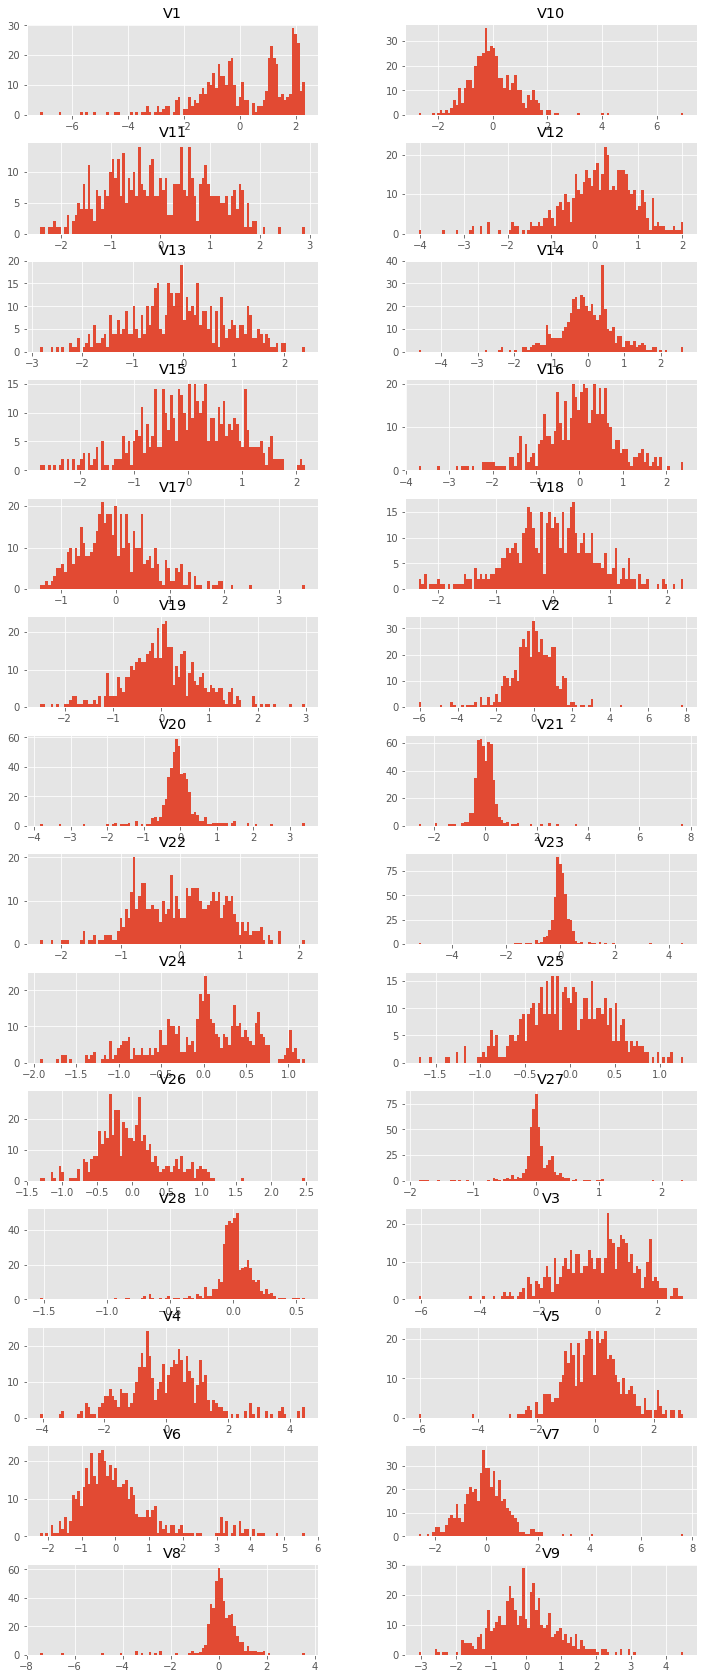

In [60]:
matplotlib.style.use('ggplot')
pca_columns = list(data)[0:-2]
normal_data[pca_columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2));

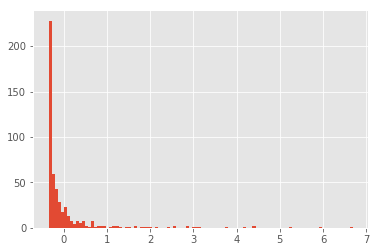

In [61]:
normal_data["normAmount"].loc[normal_data["normAmount"] < 500].hist(bins=100);

In [62]:
print("Mean", normal_data["normAmount"].mean())
print("Median", normal_data["normAmount"].median())

Mean 0.01195579998414635
Median -0.2639321378


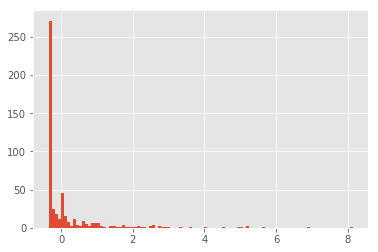

In [63]:
fraud_data["normAmount"].hist(bins=100);

In [64]:
print("Mean Fraudulent", fraud_data["normAmount"].mean())
print("Median Fraudulent", fraud_data["normAmount"].median())

Mean Fraudulent 0.13538200280995927
Median Fraudulent -0.31624709565


In [65]:
normal_pca_data = normal_data[pca_columns]
fraud_pca_data = fraud_data[pca_columns]
num_test = 65
shuffled_data = normal_pca_data.sample(frac=1)[:-num_test].values
normal_pca_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
2,-1.157678,0.079901,1.790682,-1.968303,-0.589608,0.137942,-0.641184,0.551862,-1.028029,0.331934,...,-0.282045,0.156501,0.482099,1.359236,-0.271784,-0.269525,0.063426,-0.189034,-0.062240,-0.139962
3,0.225537,-0.271419,0.500382,-1.936124,-0.383645,-0.294170,-0.009929,0.088852,-0.790604,0.253379,...,0.849369,-0.000638,0.298460,0.723612,-0.067666,-0.513540,-0.389335,-0.240228,0.047369,0.026852
4,1.269172,0.444892,0.172031,1.022692,0.015860,-0.732037,0.297024,-0.281962,-0.183246,-0.021727,...,-0.244129,-0.050330,0.018769,0.163191,-0.159069,0.072121,0.777835,-0.310421,0.021357,0.019546
5,1.446630,-0.223633,-0.175196,-0.662643,-0.557655,-1.386469,0.036918,-0.464033,-1.290823,0.659173,...,0.628052,0.125747,0.201798,0.559227,-0.176549,0.453247,0.823024,-0.088026,-0.023094,0.004101
6,1.030805,0.127611,0.311090,0.560450,0.270999,0.779545,-0.232055,0.373149,-0.007200,-0.478029,...,-1.874661,-0.211864,-0.141688,-0.279101,0.289983,-0.676193,-0.145389,0.201962,0.047171,0.020781


In [66]:
X_train = shuffled_data[:-2*num_test]

X_valid = np.concatenate([shuffled_data[-2*num_test:-num_test], fraud_pca_data[:246]])
y_valid = np.concatenate([np.zeros(num_test), np.ones(246)])

X_test = np.concatenate([shuffled_data[-num_test:], fraud_pca_data[246:]])
y_test = np.concatenate([np.zeros(num_test), np.ones(246)])

print("Size of X:",len(X_train),'   ', len(X_valid), '    ', len(X_test))
print("Size of Y:",len(y_valid), '    ', len(y_test))
print ("Size of normal_pca_data:", len(normal_pca_data))
print ("Size of fraud_pca_data:", len(fraud_pca_data))
print ("Size of fraud_data:", len(fraud_data))

Size of X: 297     311      311
Size of Y: 311      311
Size of normal_pca_data: 492
Size of fraud_pca_data: 492
Size of fraud_data: 492


In [67]:
X_Legit = data.query("Class==0").drop(["normAmount","Class"],1)
y_Legit = data.query("Class==0")["Class"]

X_Fraud = data.query("Class==1").drop(["normAmount","Class"],1)
y_Fraud = data.query("Class==1")["Class"]

print("Size of X_Legit ",len(X_Legit),'  ', "y_Legit: ", len(y_Legit))
print("Size of X_Fraud ",len(X_Fraud),'  ', "y_Fraud: ", len(y_Fraud))

Size of X_Legit  492    y_Legit:  492
Size of X_Fraud  492    y_Fraud:  492


In [68]:
def covariance_matrix(X):
    m=len(X)
    mu = X.mean()
    Sigma=0
    for i in range(m):
        Sigma += np.outer(X[i] - mu, X[i] - mu)
    return Sigma / m

In [69]:
cov_mat = covariance_matrix(X_train)
cov_mat_inv = np.linalg.pinv(cov_mat)
cov_mat_det = np.linalg.det(cov_mat)
np.matrix(cov_mat).shape

(28, 28)

In [70]:
def multi_gauss(x):
    n = len(cov_mat)
    return (np.exp(-0.5 * np.dot(x, np.dot(cov_mat_inv, x.T))) 
            / (2. * np.pi)**(n/2.) 
            / np.sqrt(cov_mat_det))

In [71]:
# Check out some resulting probablilities for Fraud examples
#X_Fraud = data.query("Class==1").drop(["Amount","Class","Time"],1)
for i in range(10):
    print(multi_gauss(X_Fraud.iloc[i]))

0.0
0.0
2.89025477655e-79
1.9279590921e-26
1.04098285642e-20
0.0
0.0
0.0
0.0
0.0


In [72]:
from sklearn.model_selection import train_test_split
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_Legit, y_Legit, test_size=0.33, random_state=42)
print(len(X_test_2))
X_test_2 = X_test_2.append(X_Fraud)
print(len(X_Fraud),'   ', len(X_test_2))
y_test_2 = y_test_2.append(y_Fraud)
print (len(X_Legit))
print (len(y_Legit))
#X_test_2.head()
#temp=X_train.head(100)
#print type(X_train)

163
492     655
492
492


In [79]:
from scipy.stats import multivariate_normal
var = multivariate_normal.pdf(X_test_2,X_test_2.mean(), cov_mat)
eps=min(var)
print(eps)

0.0


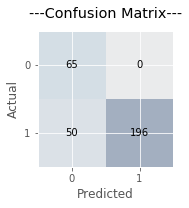

True Positive= 65 , True Negetive= 196 , False Positive= 50 , False Negetive= 0 

The accuracy is 83.922829582 %
The recall is 100.0 %
The precision is 56.5217391304 %
The F1 Score is 72.2222222222 %


In [80]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
def stats(X_test, y_test, eps):
    predictions = np.array([multi_gauss(x) <= eps for x in X_test], dtype=bool)
    y_test = np.array(y_test, dtype=bool)
    CM=confusion_matrix(y_test, predictions)
    fig, ax = plot_confusion_matrix(conf_mat=CM)
    plt.title("---Confusion Matrix---")
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.show()
    
    TP=CM[0,0]
    FN=CM[0,1]
    FP=CM[1,0]
    TN=CM[1,1]
    
    print("True Positive=",TP,", True Negetive=",TN,", False Positive=",FP,", False Negetive=",FN,"\n")
    
    accuracy=(TP+TN)/(TP+FP+FN+TN)
    recall=TP/(TP+FN)
    precision=TP/(TP+FP)
    f1=(2*precision*recall)/(precision+recall)
    
    print("The accuracy is "+str(accuracy*100) + " %")
    print("The recall is "+ str(recall*100) +" %")
    print("The precision is "+ str(precision*100) +" %")
    print("The F1 Score is "+ str(f1*100) +" %")

stats(X_valid, y_valid, eps)